In [40]:
import json
import urllib
from PIL import Image
import os 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [95]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from keras.applications.vgg16 import VGG16
from keras.optimizers import Adam

In [10]:
with open('Indian_Number_plates.txt', 'r') as f:
    text = f.read()

In [12]:
text

'{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/77d1f81a-bee6-487c-aff2-0efa31a9925c____bd7f7862-d727-11e7-ad30-e18a56154311.jpg.jpeg","annotation":[{"label":["number_plate"],"notes":"","points":[{"x":0.7220843672456576,"y":0.5879828326180258},{"x":0.8684863523573201,"y":0.6888412017167382}],"imageWidth":806,"imageHeight":466}],"extras":null}\n{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/4eb236a3-6547-4103-b46f-3756d21128a9___06-Sanjay-Dutt.jpg.jpeg","annotation":[{"label":["number_plate"],"notes":"","points":[{"x":0.16194331983805668,"y":0.8507795100222717},{"x":0.582995951417004,"y":1}],"imageWidth":494,"imageHeight":449}],"extras":null}\n{"content": "http://com.dataturks.a96-i23.open.s3.amazonaws.com/2c9fafb0646e9cf9016473f1a561002a/84969111-2ec3-4914-b3bb-da5aaac701e7___1.jpg.jpeg","annotation":[{"label":["number_plate"],"notes":"","points":[{"x":0.082,"y":0.697452229299363},{"x":0

In [13]:
with open('Indian_Number_plates.json', 'w') as j:
    j.write(text)

In [14]:
df = pd.read_json('Indian_Number_plates.json', lines=True)

In [15]:
df.head()

,content,annotation,extras
0,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
1,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
2,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
3,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN
4,http://com.dataturks.a96-i23.open.s3.amazonaws...,"[{'label': ['number_plate'], 'notes': '', 'poi...",NaN


In [21]:
df.extras.isnull().sum()

237

In [16]:
len(df)

237

In [23]:
os.mkdir('Indian Number Plates')

In [24]:
df.annotation[0]

[{'label': ['number_plate'],
  'notes': '',
  'points': [{'x': 0.722084367245657, 'y': 0.5879828326180251},
   {'x': 0.8684863523573201, 'y': 0.688841201716738}],
  'imageWidth': 806,
  'imageHeight': 466}]

In [26]:
dataset = dict()
dataset['image_name'] = list()
dataset['image_width'] = list()
dataset['image_height'] = list()
dataset['top_x'] = list()
dataset['top_y'] = list()
dataset['bottom_x'] = list()
dataset['bottom_y'] = list()

counter = 0
for index, row in df.iterrows():
    img = urllib.request.urlopen(row['content'])
    img = Image.open(img)
    img = img.convert('RGB')
    img.save(f'Indian Number Plates/licensed_car{counter}.jpeg', 'jpeg')
    
    dataset['image_name'].append(f'licensed_car{counter}')
    
    data = row['annotation']
    
    dataset['image_width'].append(data[0]['imageWidth'])
    dataset['image_height'].append(data[0]['imageHeight'])    
    dataset['top_x'].append(data[0]['points'][0]['x'])    
    dataset['top_y'].append(data[0]['points'][0]['y'])        
    dataset['bottom_x'].append(data[0]['points'][1]['x'])        
    dataset['bottom_y'].append(data[0]['points'][1]['y'])            
    
    counter +=1
print(f'Downloaded {counter} images.')

Downloaded 237 images.


In [96]:
df = pd.DataFrame(dataset)
df.head()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0,806,466,0.722084,0.587983,0.868486,0.688841
1,licensed_car1,494,449,0.161943,0.850780,0.582996,1.000000
2,licensed_car2,500,314,0.082000,0.697452,0.230000,0.828025
3,licensed_car3,500,469,0.434000,0.667377,0.718000,0.765458
4,licensed_car4,1001,563,0.208791,0.390764,0.865135,0.984014


In [127]:
df.to_csv('normal_insulators/indian_license_plates.csv', index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'normal_insulators/indian_license_plates.csv'

In [97]:
df = pd.read_csv('indian_license_plates.csv')
df['image_name'] = df['image_name'] + '.jpeg'
df.drop(['image_width', 'image_height'], axis=1, inplace=True)
df.head()

,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.jpeg,0.722084,0.587983,0.868486,0.688841
1,licensed_car1.jpeg,0.161943,0.850780,0.582996,1.000000
2,licensed_car2.jpeg,0.082000,0.697452,0.230000,0.828025
3,licensed_car3.jpeg,0.434000,0.667377,0.718000,0.765458
4,licensed_car4.jpeg,0.208791,0.390764,0.865135,0.984014


In [98]:
lucky_test_samples = np.random.randint(0, len(df), 5)
reduced_df = df.drop(lucky_test_samples, axis=0)
len(reduced_df)

232

In [99]:
237/5

47.4

In [41]:
WIDTH = 224
HEIGHT = 224
CHANNEL = 3

def show_img(index):
    image = cv2.imread('Indian Number Plates/' + df['image_name'].iloc[index])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, dsize=(WIDTH, HEIGHT))
    
    tx = int(df['top_x'].iloc[index] * WIDTH)
    ty = int(df['top_y'].iloc[index] * HEIGHT)
    bx = int(df['bottom_x'].iloc[index] * WIDTH)
    by = int(df['bottom_y'].iloc[index] * HEIGHT)
    
    image = cv2.rectangle(image, (tx,ty), (bx, by), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()

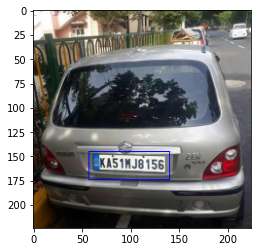

In [43]:
show_img(5)

In [112]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [113]:
train_generator = datagen.flow_from_dataframe(reduced_df,
                                             directory='Indian Number Plates/',
                                             x_col='image_name',
                                             y_col=['top_x', 'top_y', 'bottom_x', 'bottom_y'],
                                             target_size=(WIDTH, HEIGHT),
                                             batch_size=32,
                                             class_mode='raw',
                                             subset='training')
validation_generator = datagen.flow_from_dataframe(reduced_df,
                                             directory='Indian Number Plates/',
                                             x_col='image_name',
                                             y_col=['top_x', 'top_y', 'bottom_x', 'bottom_y'],
                                             target_size=(WIDTH, HEIGHT),
                                             batch_size=32,
                                             class_mode='raw',
                                             subset='validation')

Found 209 validated image filenames.
Found 23 validated image filenames.


In [114]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL))

In [115]:
model = Sequential([
    conv_base,
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='sigmoid')
])

In [116]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               3211392   
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 260       
Total params: 17,934,596
Trainable params: 17,934,596
Non-trainable params: 0
_________________________________________________________________


In [117]:
len(model.trainable_weights)

32

In [118]:
conv_base.trainable = False

In [119]:
len(model.trainable_weights)

6

In [120]:
validation_generator.batch_size

32

In [121]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.n / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.n / validation_generator.batch_size))

print('Step train: ', STEP_SIZE_TRAIN)
print('Step validation: ', STEP_SIZE_VAL)

Step train:  7
Step validation:  1


In [122]:
adam = Adam(learning_rate=0.0005)
model.compile(optimizer=adam, loss='mse')

In [123]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=STEP_SIZE_TRAIN,
                             validation_data=validation_generator,
                             validation_steps=STEP_SIZE_VAL,
                             epochs=30)

Epoch 1/30
7/7 [==============================] - 9s 1s/step - loss: 0.0722 - val_loss: 0.0810
Epoch 2/30
7/7 [==============================] - 1s 140ms/step - loss: 0.0654 - val_loss: 0.0876
Epoch 3/30
7/7 [==============================] - 1s 146ms/step - loss: 0.0611 - val_loss: 0.0823
Epoch 4/30
7/7 [==============================] - 1s 149ms/step - loss: 0.0590 - val_loss: 0.0794
Epoch 5/30
7/7 [==============================] - 1s 144ms/step - loss: 0.0586 - val_loss: 0.0788
Epoch 6/30
7/7 [==============================] - 1s 154ms/step - loss: 0.0572 - val_loss: 0.0780
Epoch 7/30
7/7 [==============================] - 1s 142ms/step - loss: 0.0575 - val_loss: 0.0778
Epoch 8/30
7/7 [==============================] - 1s 157ms/step - loss: 0.0579 - val_loss: 0.0778
Epoch 9/30
7/7 [==============================] - 1s 149ms/step - loss: 0.0562 - val_loss: 0.0778
Epoch 10/30
7/7 [==============================] - 1s 142ms/step - loss: 0.0571 - val_loss: 0.0777
Epoch 11/30
7/7 [=====

In [124]:
history.history

{'val_loss': [0.08096219599246979,
  0.08756500482559204,
  0.08232755959033966,
  0.07935865223407745,
  0.07875199615955353,
  0.07801015675067902,
  0.07780253887176514,
  0.07778751850128174,
  0.07779093086719513,
  0.07766426354646683,
  0.07782775163650513,
  0.07778125256299973,
  0.07763790339231491,
  0.07791923731565475,
  0.07770226150751114,
  0.07764440774917603,
  0.07626253366470337,
  0.05392374098300934,
  0.0497933067381382,
  0.04506182670593262,
  0.04411318525671959,
  0.04493020847439766,
  0.04528328776359558,
  0.046386998146772385,
  0.04565277323126793,
  0.04469626769423485,
  0.04407741129398346,
  0.04421113431453705,
  0.0450703464448452,
  0.04524172469973564],
 'loss': [0.07095611409137123,
  0.06483469286746385,
  0.06109434284234161,
  0.058811491542455685,
  0.05784060481632725,
  0.057341054723593604,
  0.057065004973035106,
  0.0568583906053356,
  0.05676611042336414,
  0.05669376902888266,
  0.05666921517709225,
  0.056646457966862684,
  0.0566298

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


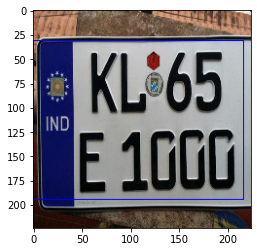

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


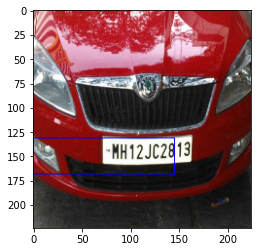

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


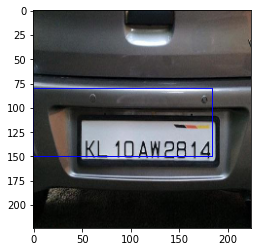

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


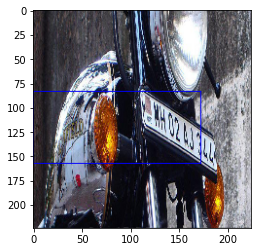

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


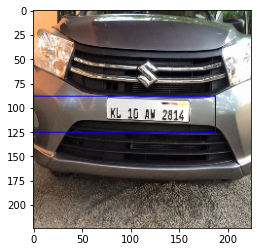

In [126]:
for idx, row in df.iloc[lucky_test_samples].iterrows():
    img = cv2.resize(cv2.imread('Indian Number Plates/' + row[0]) / 255,
                    dsize=(WIDTH, HEIGHT))
    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH
    
    xt, yt = y_hat[0], y_hat[1]
    xb, yb = y_hat[2], y_hat[3]
    
    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (xt,yt), (xb, yb),(0,0,255),1)
    plt.imshow(image)
    plt.show()